<div style="text-align: center; margin-bottom: 3em;">
    
# CoCo: Learning how to use Fatiando a Terra tools

</div>
    
<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="width: 50%; padding: 0px 1%;">

In this notebook we will learn how we can use the Fatiando a Terra tools to
process gravity data (or any spatial data).

Processing gravity data might seem easy, although there are a lot of details
that we must to take into account.
Nevertheless, the idea of this notebook is not to become experts on gravity
modelling, but to use it as an excuse for learning more Python and how should
we approach learning a new library.

A very nice place to start learning a new tool is its website and its
documentation pages.

The Fatiando a Terra project has its own website: https://www.fatiando.org


The project is composed by different open-source Python libraries, each one
with a specific goal and set of problems that they tackle.
Each one of these libraries has its own documentation pages:
- Pooch: https://www.fatiando.org/pooch
- Boule: https://www.fatiando.org/boule
- Verde: https://www.fatiando.org/verde
- Harmonica: https://www.fatiando.org/harmonica
    
## Goals

- Import new libraries
- Read documentation (online and docstrings)
- Download data with Pooch
- Handle spatial data with Verde
- Compute normal gravity with Boule
- Process gravity data with Harmonica
    
</div>


<div style="width: 50%; padding: 0px 1%;">

En este notebook vamos a aprender cómo podemos utilizar las herramientas de
Fatiando a Terra para procesar datos de gravedad (o cualquier tipo de dato
espacial).

El procesamiento de datos gravimétricos puede parecer sencillo, sin embargo hay
muchos detalles que se deben tener en cuenta.
Sin embargo, la idea de este notebook no es convertirnos en expertxs en el
modelado gravimétrico, sino utilizarlo como excusa para aprender más sobre
Python y cómo debemos proceder a la hora de aprender una nueva librería.

Un muy buen lugar para comenzar a aprender una nueva librería es su sitio web
y sus páginas de documentación.

El proyecto Fatiando a Terra posee su propia página web:
https://www.fatiando.org

El proyecto está compuesto por diferentes librerías open-source escritas en
Python, cada una con objetivos específicos y problemas que permiten resolver.
Cada una de estas librerías posee sus propias páginas de documentación:
- Pooch: https://www.fatiando.org/pooch
- Boule: https://www.fatiando.org/boule
- Verde: https://www.fatiando.org/verde
- Harmonica: https://www.fatiando.org/harmonica
    
    
## Objetivos

- Importar librerías nuevas
- Leer documentación (online y docstrings)
- Descargar datos con Pooch
- Manipular datos espaciales con Verde
- Calcular gravedad normal con Boule
- Procesar datos gravimétricos con Harmonica

    
</div>

</div>


## Import packages | Importar paquetes

Import Numpy, Pandas and Matplotlib for managing and plotting our data.

Importemos Numpy, Pandas y Matplotlib para gestionar nuestros datos y graficarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets import Xarray, a library similar to Pandas, but it allows us to work with multidimensional data besides tabular data.

Importemos Xarray, una librería similar a Pandas, pero que nos permite trabajar con datos multidimensionales en vez de datos tabulados.

In [2]:
import xarray as xr

Additionally, we will import **pygmt**, a library that brings the power of [GMT](https://www.generic-mapping-tools.org/) (the Generic Mapping Tools) to Python.

Además, importemos **pygmt**, una librería que nos trae todo el poder de [GMT](https://www.generic-mapping-tools.org/) (the Generic Mapping Tools) a Python.

In [3]:
import pygmt

Lets import **pyproj**: it will help us to convert geographic coordinates into Cartesian coordinates through map projections.

Importemos **pyproj** para poder convertir coordeanadas geográficas en coordenadas Cartesianas mediante proyecciones.

In [4]:
import pyproj

Finally, lets import some Fatiando libraries.

Finalmente, importemos algunas librerías de Fatiando.

In [5]:
import pooch
import verde as vd
import boule as bl
import harmonica as hm

## Fetch data | Descarguemos datos

En este notebook vamos a utilizar tres tipos de datos diferentes:

- **datos gravimétricos**: vamos a utilizar un conjunto de  datos gravimétricos sobre Sudáfrica.Estos datos consisten en mediciones de la aceleración gravitatoria producida por el planeta Tierra sobre diferentes puntos de observación ubicados sobre la superficie de Sudáfrica. Los datos gravimétricos vienen dados en mGal, una unidad que equivale a 1e5 m/s^2.
- **altitud del geoide**: las altitudes de observación de los datos gravimétricos que trabajaremos vienen dadas en altitudes sobre el nivel del mar, o bien, altitudes sobre el **geoide** (el geoide es una superficie equipotencial que coincide con el nivel del mar). Esto representa un problema en gravimetría: el nivel del mar depende de la distribución de masa en el interior de la Tierra. Es por ello que vamos a necesitar de la altitud del geoide sobre el **elipsoide de referencia** para poder convertir las altitudes sobre el geoide de los datos gravimétricos a altitudes sobre el elipsoide.
- **topografía de Sudáfrica**: el último paso de este notebook consistirá en remover el efecto gravitatorio de la topografía de Sudáfrica de nuestros datos. Para ello necesitamos un DEM (modelo de elevación digital) o una grilla de topografía.

Todos estos datos se encuentran disponibles bajo licencia Creative Commons Attribution en https://doi.org/10.5281/zenodo.5167357.
Veamos cómo podemos utilizar Pooch para descargar estos datos a nuestra computadora para luego poder cargarlos en nuestros notebooks.

Definimos el Digital Object Identified (DOI) del archivo de Zenodo en el cual se encuentran nuestros datos.

In [6]:
doi = "10.5281/zenodo.5167357"

Utilicemos la función `pooch.retrieve` para descargar los archivos de datos `southern-africa-gravity.csv.xz`, `earth-geoid-10arcmin.nc` y `earth-topography-10arcmin.nc`. Además, vamos a utilizar la suma de comprobación de estos archivos, de forma tal que Pooch pueda verificar que los archivos que se descarguen no estén corruptos.

In [7]:
gravity = f"doi:{doi}/southern-africa-gravity.csv.xz"
gravity_hash = "md5:1dee324a14e647855366d6eb01a1ef35"

path_gravity = pooch.retrieve(gravity, known_hash=gravity_hash, progressbar=True)
path_gravity

'/home/santi/.cache/pooch/54dd32a533b3783209a50adf11640117-southern-africa-gravity.csv.xz'

In [8]:
geoid = f"doi:{doi}/earth-geoid-10arcmin.nc"
geoid_hash = "md5:39b97344e704eb68fa381df2eb47da0f"

path_geoid = pooch.retrieve(geoid, known_hash=geoid_hash, progressbar=True)
path_geoid

'/home/santi/.cache/pooch/48a36edc9628185b57fa0b9205baf50e-earth-geoid-10arcmin.nc'

In [9]:
topography = f"doi:{doi}/earth-topography-10arcmin.nc"
topography_hash = "md5:c43b61322e03669c4313ba3d9a58028d"

path_topography = pooch.retrieve(
    topography, known_hash=topography_hash, progressbar=True
)
path_topography

'/home/santi/.cache/pooch/cfd6d849435e1ca109cf31d2dae3fe32-earth-topography-10arcmin.nc'

## Load the data | Cargar los datos

Comencemos por los **datos gravimétricos**. Dado que los datos de gravedad que descargamos consiste en un archivo CSV (comprimido en un .xz), vamos a utilizar Pandas para leerlo.

In [10]:
data = pd.read_csv(path_gravity)
data

,longitude,latitude,height_sea_level_m,gravity_mgal
0,18.34444,-34.12971,32.2,979656.12
1,18.36028,-34.08833,592.5,979508.21
2,18.37418,-34.19583,18.4,979666.46
3,18.40388,-34.23972,25.0,979671.03
4,18.41112,-34.16444,228.7,979616.11
...,...,...,...,...
14354,21.22500,-17.95833,1053.1,978182.09
14355,21.27500,-17.98333,1033.3,978183.09
14356,21.70833,-17.99166,1041.8,978182.69
14357,21.85000,-17.95833,1033.3,978193.18


Tanto los datos de **topografía** y **altitud de geoide** vienen dados en grillas regulares en archivos netCDF (.nc). Para cargar estos datos vamos a hacer uso de Xarray.

In [11]:
geoid = xr.load_dataarray(path_geoid)
geoid

<xarray.DataArray 'geoid' (latitude: 1081, longitude: 2161)>
array([[-29.5     , -29.5     , -29.5     , ..., -29.5     , -29.5     ,
        -29.5     ],
       [-29.5     , -29.5     , -29.5     , ..., -29.5     , -29.5     ,
        -29.5     ],
       [-29.6     , -29.6     , -29.6     , ..., -29.6     , -29.6     ,
        -29.6     ],
       ...,
       [ 14.7     ,  14.7     ,  14.7     , ...,  14.7     ,  14.7     ,
         14.7     ],
       [ 15.2     ,  15.2     ,  15.2     , ...,  15.2     ,  15.2     ,
         15.2     ],
       [ 15.400001,  15.400001,  15.400001, ...,  15.400001,  15.400001,
         15.400001]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
Attributes:
    Conventions:     CF-1.8
    title:           Geoid height (EIGEN-6C4) with respect to WGS84
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       geoid height
    standard_name:   geoid_height_above_reference_ellipsoid
    description:     height of the geoid with respect to the WGS84 ellipsoid
    units:           m
    actual_range:    [-106.5   86. ]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

Plot the data

In [12]:
topography = xr.load_dataarray(path_topography)
topography

<xarray.DataArray 'topography' (latitude: 1081, longitude: 2161)>
array([[ 2742.,  2742.,  2742., ...,  2742.,  2742.,  2742.],
       [ 2768.,  2768.,  2768., ...,  2768.,  2768.,  2768.],
       [ 2822.,  2822.,  2821., ...,  2822.,  2822.,  2822.],
       ...,
       [-4243., -4244., -4245., ..., -4242., -4243., -4243.],
       [-4156., -4157., -4157., ..., -4156., -4156., -4156.],
       [-4237., -4237., -4237., ..., -4237., -4237., -4237.]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
Attributes:
    Conventions:     CF-1.8
    title:           Topographic and bathymetric height of ETOPO1 (ice surfac...
    crs:             WGS84
    source:          Generated from a spherical harmonic model by the ICGEM C...
    license:         public domain
    references:      https://doi.org/10.7289/V5C8276M
    long_name:       topographic height above mean sea level
    standard_name:   height_above_mean_sea_level
    description:     height topography/bathymetry referenced to mean sea level
    units:           m
    actual_range:    [-10023.   6082.]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

## Plot the data | Grafiquemos los datos

Todos los datos que descargamos se encuentran georeferenciados en coordenadas elipsoidales (latitud, longitud). Es por ello que para poder visualizarlos es recomendable utilizar librerías que permitan graficar este tipo de datos de forma adecuada. Para ello vamos a utilizar **pyGMT**.

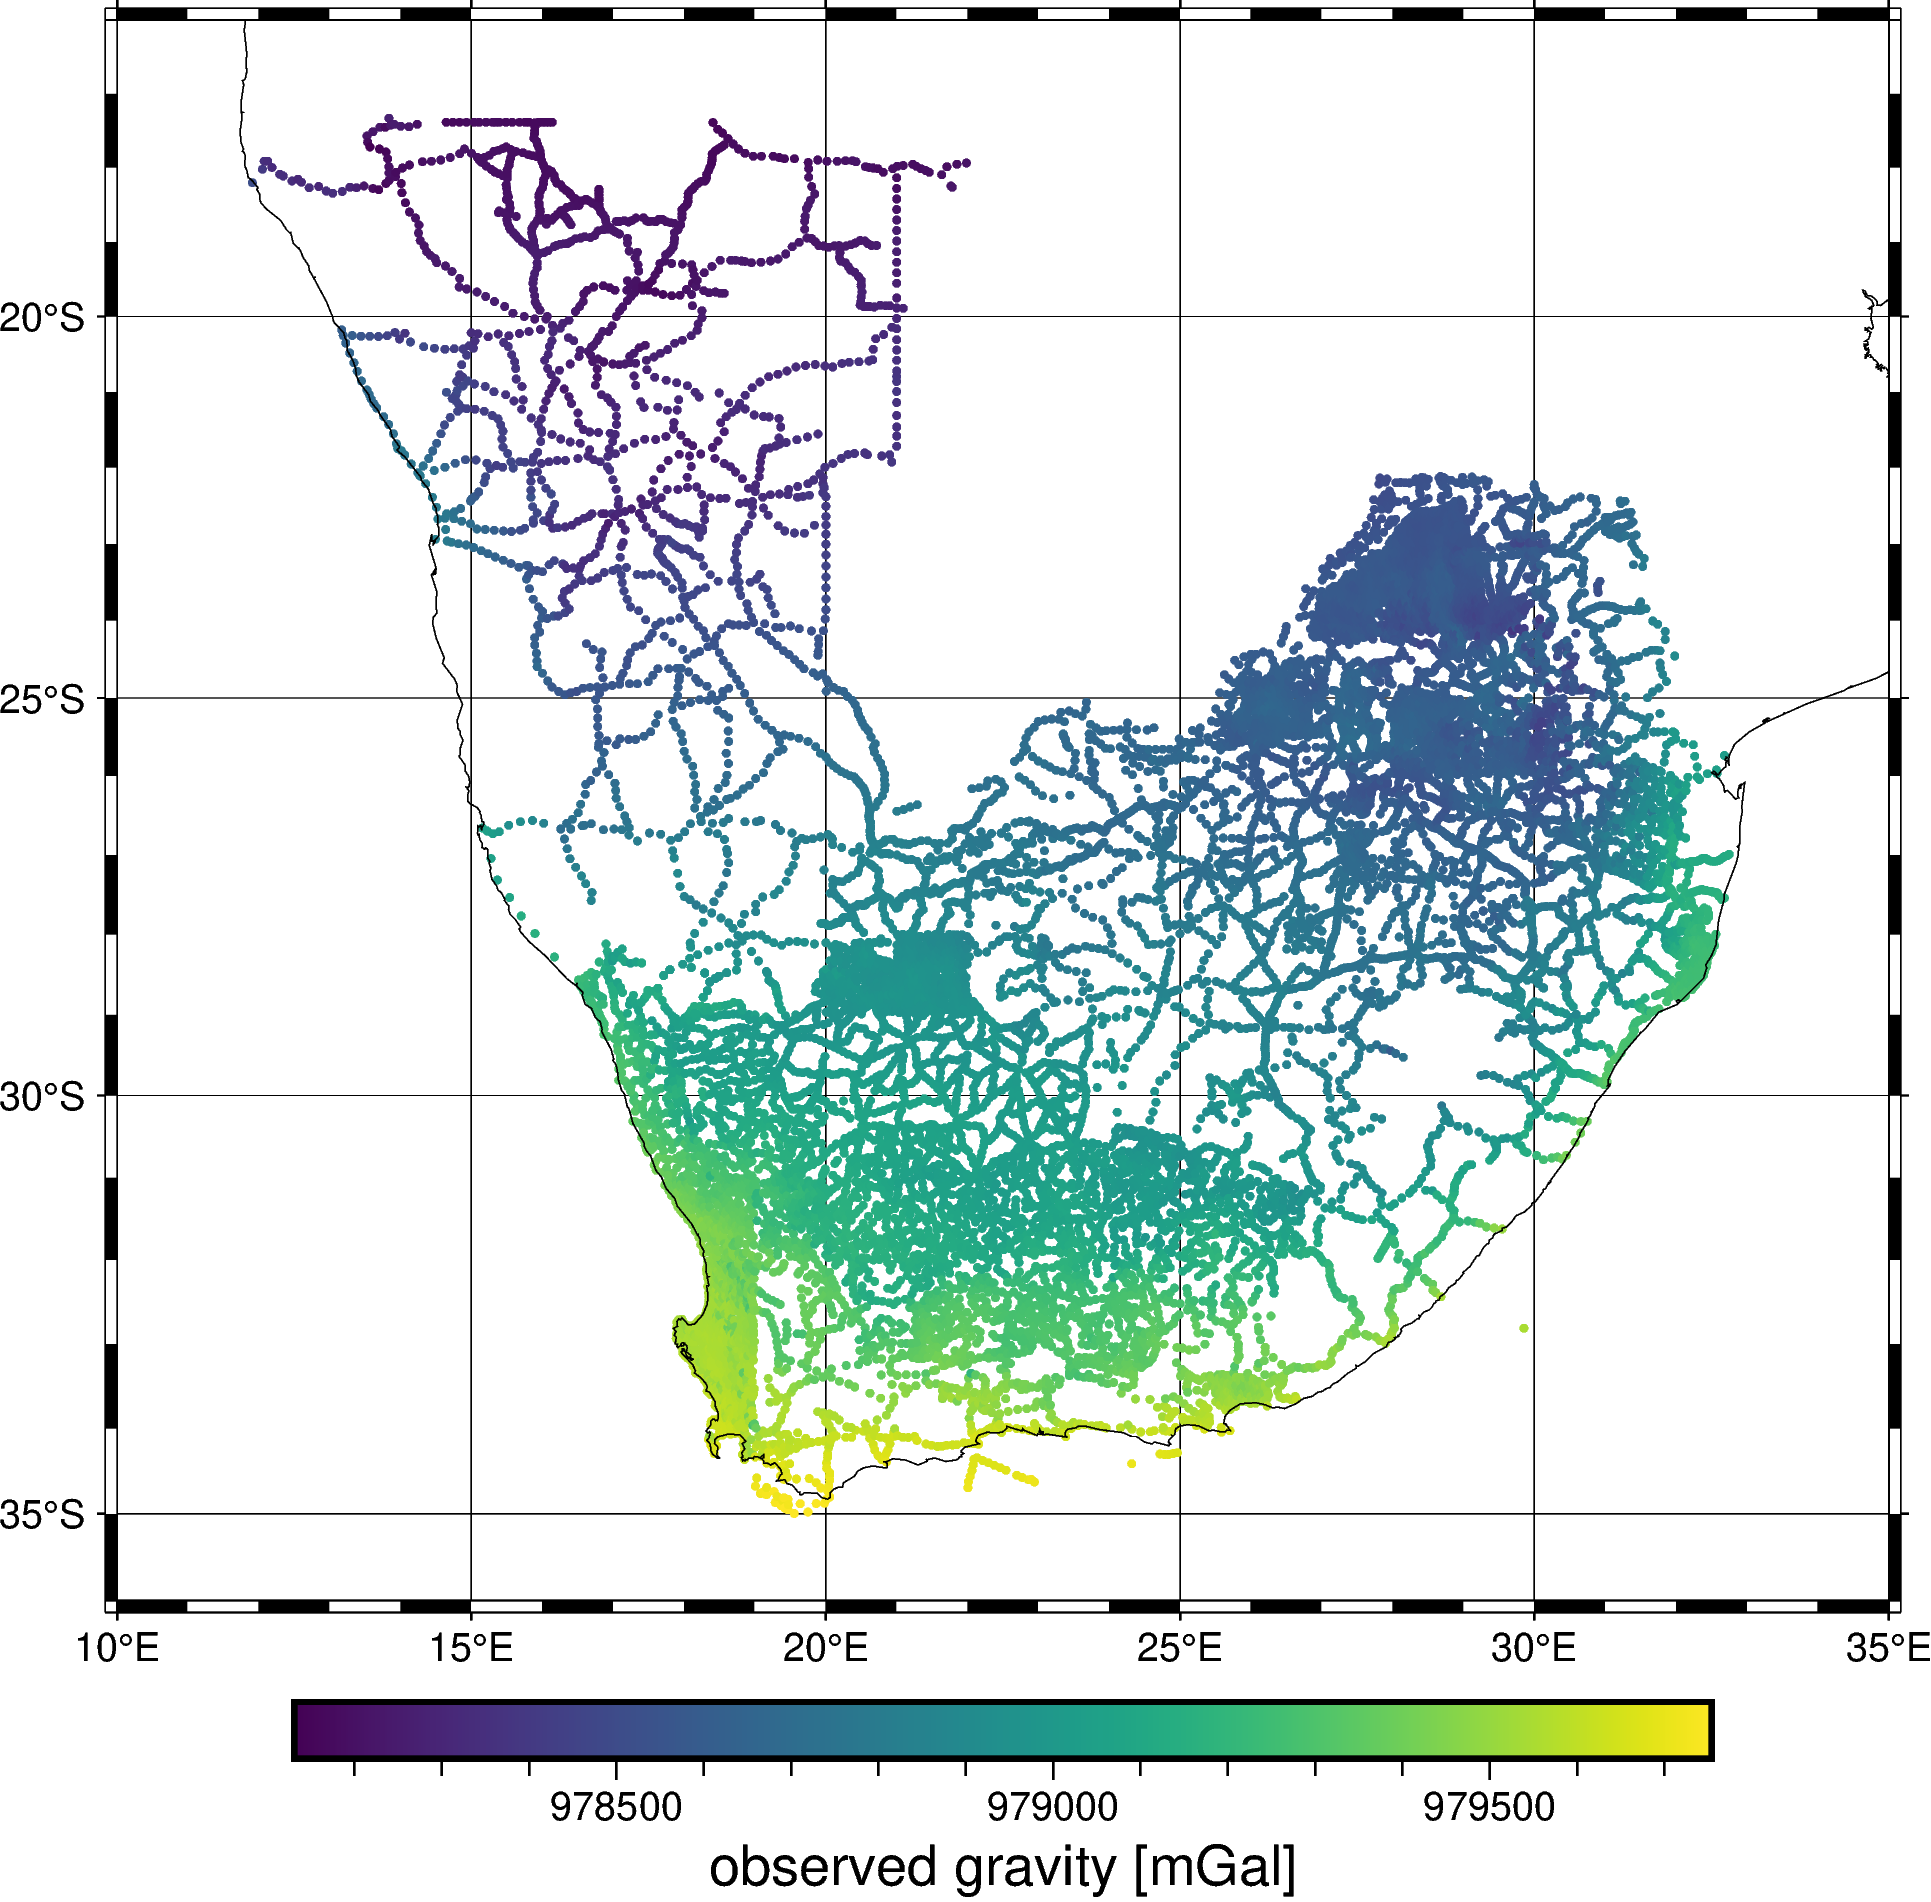

In [13]:
fig = pygmt.Figure()
pygmt.makecpt(
    cmap="viridis",
    series=[data.gravity_mgal.min(), data.gravity_mgal.max()]
)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True, 
    style="c2p",  # circles with 4px as diameter
    projection="M15c",  # mercator projection with 15cm of width
    frame="afg"
)
fig.coast(shorelines="black", area_thresh=1e6)
fig.colorbar(frame='af+l"observed gravity [mGal]')
fig.show()

## Crop the data to the Bushveld | Recortemos los datos sobre Bushveld

Como podemos ver, los datos de gravedad pertenecen a toda Sudáfrica, sin embargo nuestra zona de interés es la región de Bushveld. Las grillas de geoide y topografía vamos a recortarlas a regiones un poco más extensas, con el objetivo de evitar efectos de borde en los posteriores procesos.

Definamos la región de Bushveld en grados (oeste, este, sur, norte):

In [14]:
region = (25, 32, -27, -23)

Agrandemos la region para utilizar con las grillas. Para ello haremos uso de la función `vd.pad_region()` de Verde:

In [15]:
region_pad = vd.pad_region(region, pad=5)
region_pad

(20, 37, -32, -18)

Podemos utilizar la función `vd.inside` de Verde para obtener qué datos se encuentran dentro de nuestra región y luego recortarlos con Pandas.

In [16]:
inside_points = vd.inside((data.longitude, data.latitude), region)

data = data[inside_points]
data

,longitude,latitude,height_sea_level_m,gravity_mgal
8648,25.01500,-26.26334,1230.2,978681.38
8649,25.01932,-26.38713,1297.0,978669.02
8650,25.02499,-26.39667,1304.8,978669.28
8651,25.04500,-26.07668,1165.2,978681.08
8652,25.07668,-26.35001,1262.5,978665.19
...,...,...,...,...
12974,31.51500,-23.86333,300.5,978776.85
12975,31.52499,-23.30000,280.7,978798.55
12976,31.54832,-23.19333,245.7,978803.55
12977,31.57333,-23.84833,226.8,978808.44


Para recortar las grillas podemos utilizar directamente el método `sel()` de los `xarray.DataArray`.

In [17]:
geoid = geoid.sel(
    longitude=slice(region_pad[0], region_pad[1]),
    latitude=slice(region_pad[2], region[3])
)
geoid

<xarray.DataArray 'geoid' (latitude: 55, longitude: 103)>
array([[35.4      , 36.2      , 36.8      , ..., 21.7      , 21.       ,
        20.4      ],
       [36.       , 36.600002 , 36.8      , ..., 21.4      , 20.7      ,
        20.1      ],
       [36.2      , 36.5      , 36.600002 , ..., 21.       , 20.300001 ,
        19.6      ],
       ...,
       [26.       , 25.800001 , 25.6      , ...,  3.       ,  3.       ,
         2.8      ],
       [25.800001 , 25.6      , 25.300001 , ...,  2.6000001,  2.5      ,
         2.2      ],
       [25.5      , 25.300001 , 25.       , ...,  2.2      ,  2.1000001,
         1.8000001]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 20.0 20.17 20.33 20.5 ... 36.67 36.83 37.0
  * latitude   (latitude) float64 -32.0 -31.83 -31.67 ... -23.33 -23.17 -23.0
Attributes:
    Conventions:     CF-1.8
    title:           Geoid height (EIGEN-6C4) with respect to WGS84
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       geoid height
    standard_name:   geoid_height_above_reference_ellipsoid
    description:     height of the geoid with respect to the WGS84 ellipsoid
    units:           m
    actual_range:    [-106.5   86. ]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

In [18]:
topography = topography.sel(
    longitude=slice(region_pad[0], region_pad[1]),
    latitude=slice(region_pad[2], region_pad[3])
)
topography

<xarray.DataArray 'topography' (latitude: 85, longitude: 103)>
array([[ 1013.,  1236.,  1335., ..., -3867., -4446., -4842.],
       [ 1206.,  1270.,  1227., ..., -3790., -4350., -4736.],
       [ 1245.,  1197.,  1104., ..., -3847., -4362., -4703.],
       ...,
       [ 1128.,  1123.,  1113., ...,    -7.,   -32.,   -18.],
       [ 1115.,  1107.,  1098., ...,    17.,   -10.,   -21.],
       [ 1102.,  1094.,  1084., ...,    18.,     9.,   -13.]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 20.0 20.17 20.33 20.5 ... 36.67 36.83 37.0
  * latitude   (latitude) float64 -32.0 -31.83 -31.67 ... -18.33 -18.17 -18.0
Attributes:
    Conventions:     CF-1.8
    title:           Topographic and bathymetric height of ETOPO1 (ice surfac...
    crs:             WGS84
    source:          Generated from a spherical harmonic model by the ICGEM C...
    license:         public domain
    references:      https://doi.org/10.7289/V5C8276M
    long_name:       topographic height above mean sea level
    standard_name:   height_above_mean_sea_level
    description:     height topography/bathymetry referenced to mean sea level
    units:           m
    actual_range:    [-10023.   6082.]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

## Plot the data

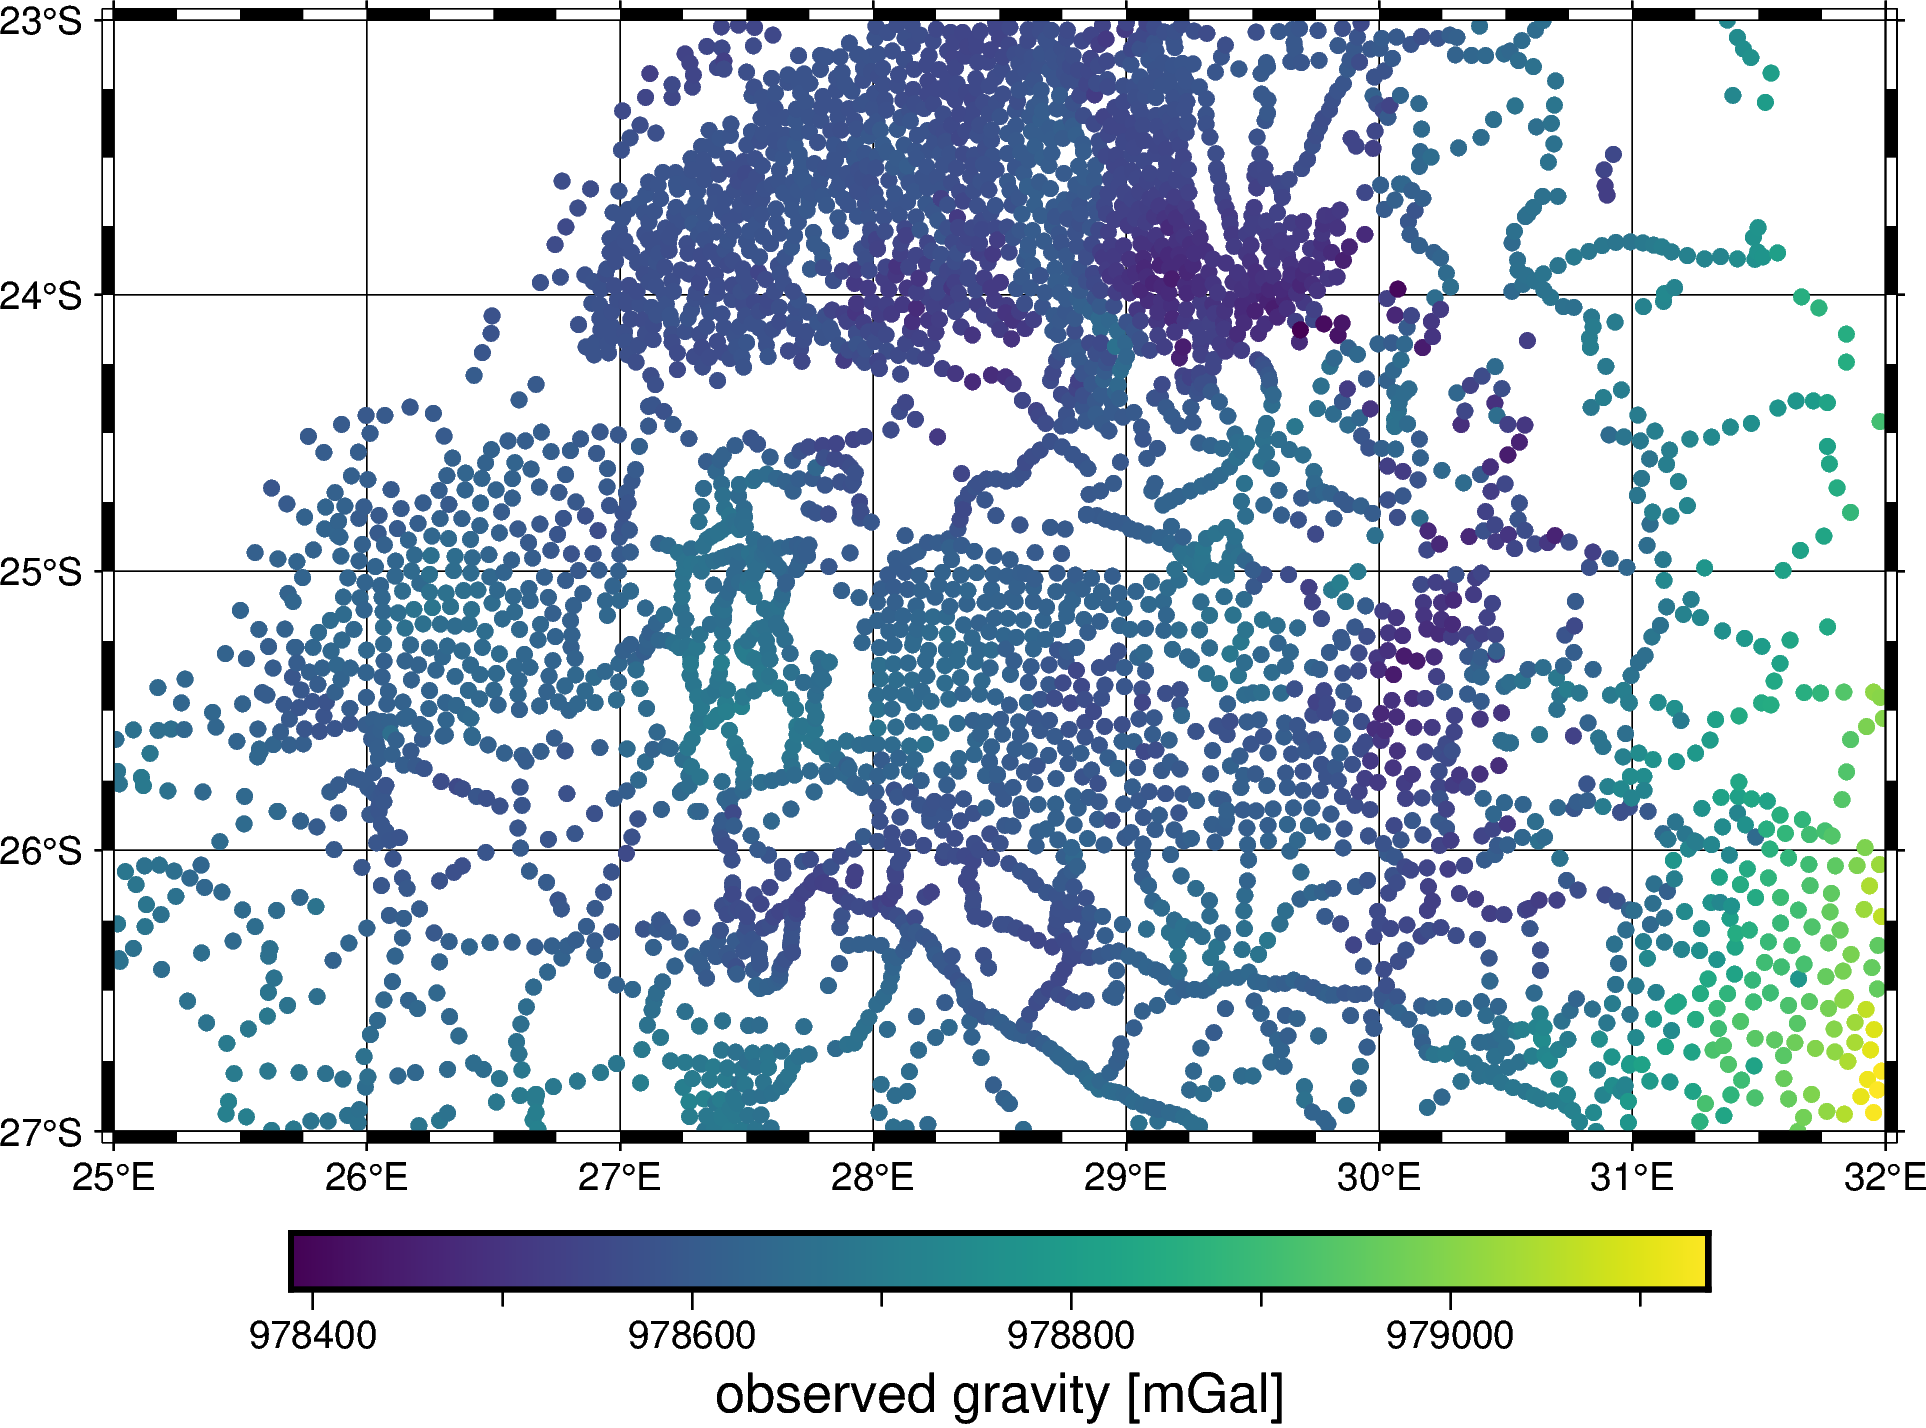

In [19]:
fig = pygmt.Figure()
pygmt.makecpt(
    cmap="viridis",
    series=[data.gravity_mgal.min(), data.gravity_mgal.max()]
)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True, 
    style="c4p",  # circles with 4px as diameter
    projection="M15c",  # mercator projection with 15cm of width
    frame="afg"
)
fig.coast(shorelines="black", area_thresh=1e6)
fig.colorbar(frame='af+l"observed gravity [mGal]')
fig.show()

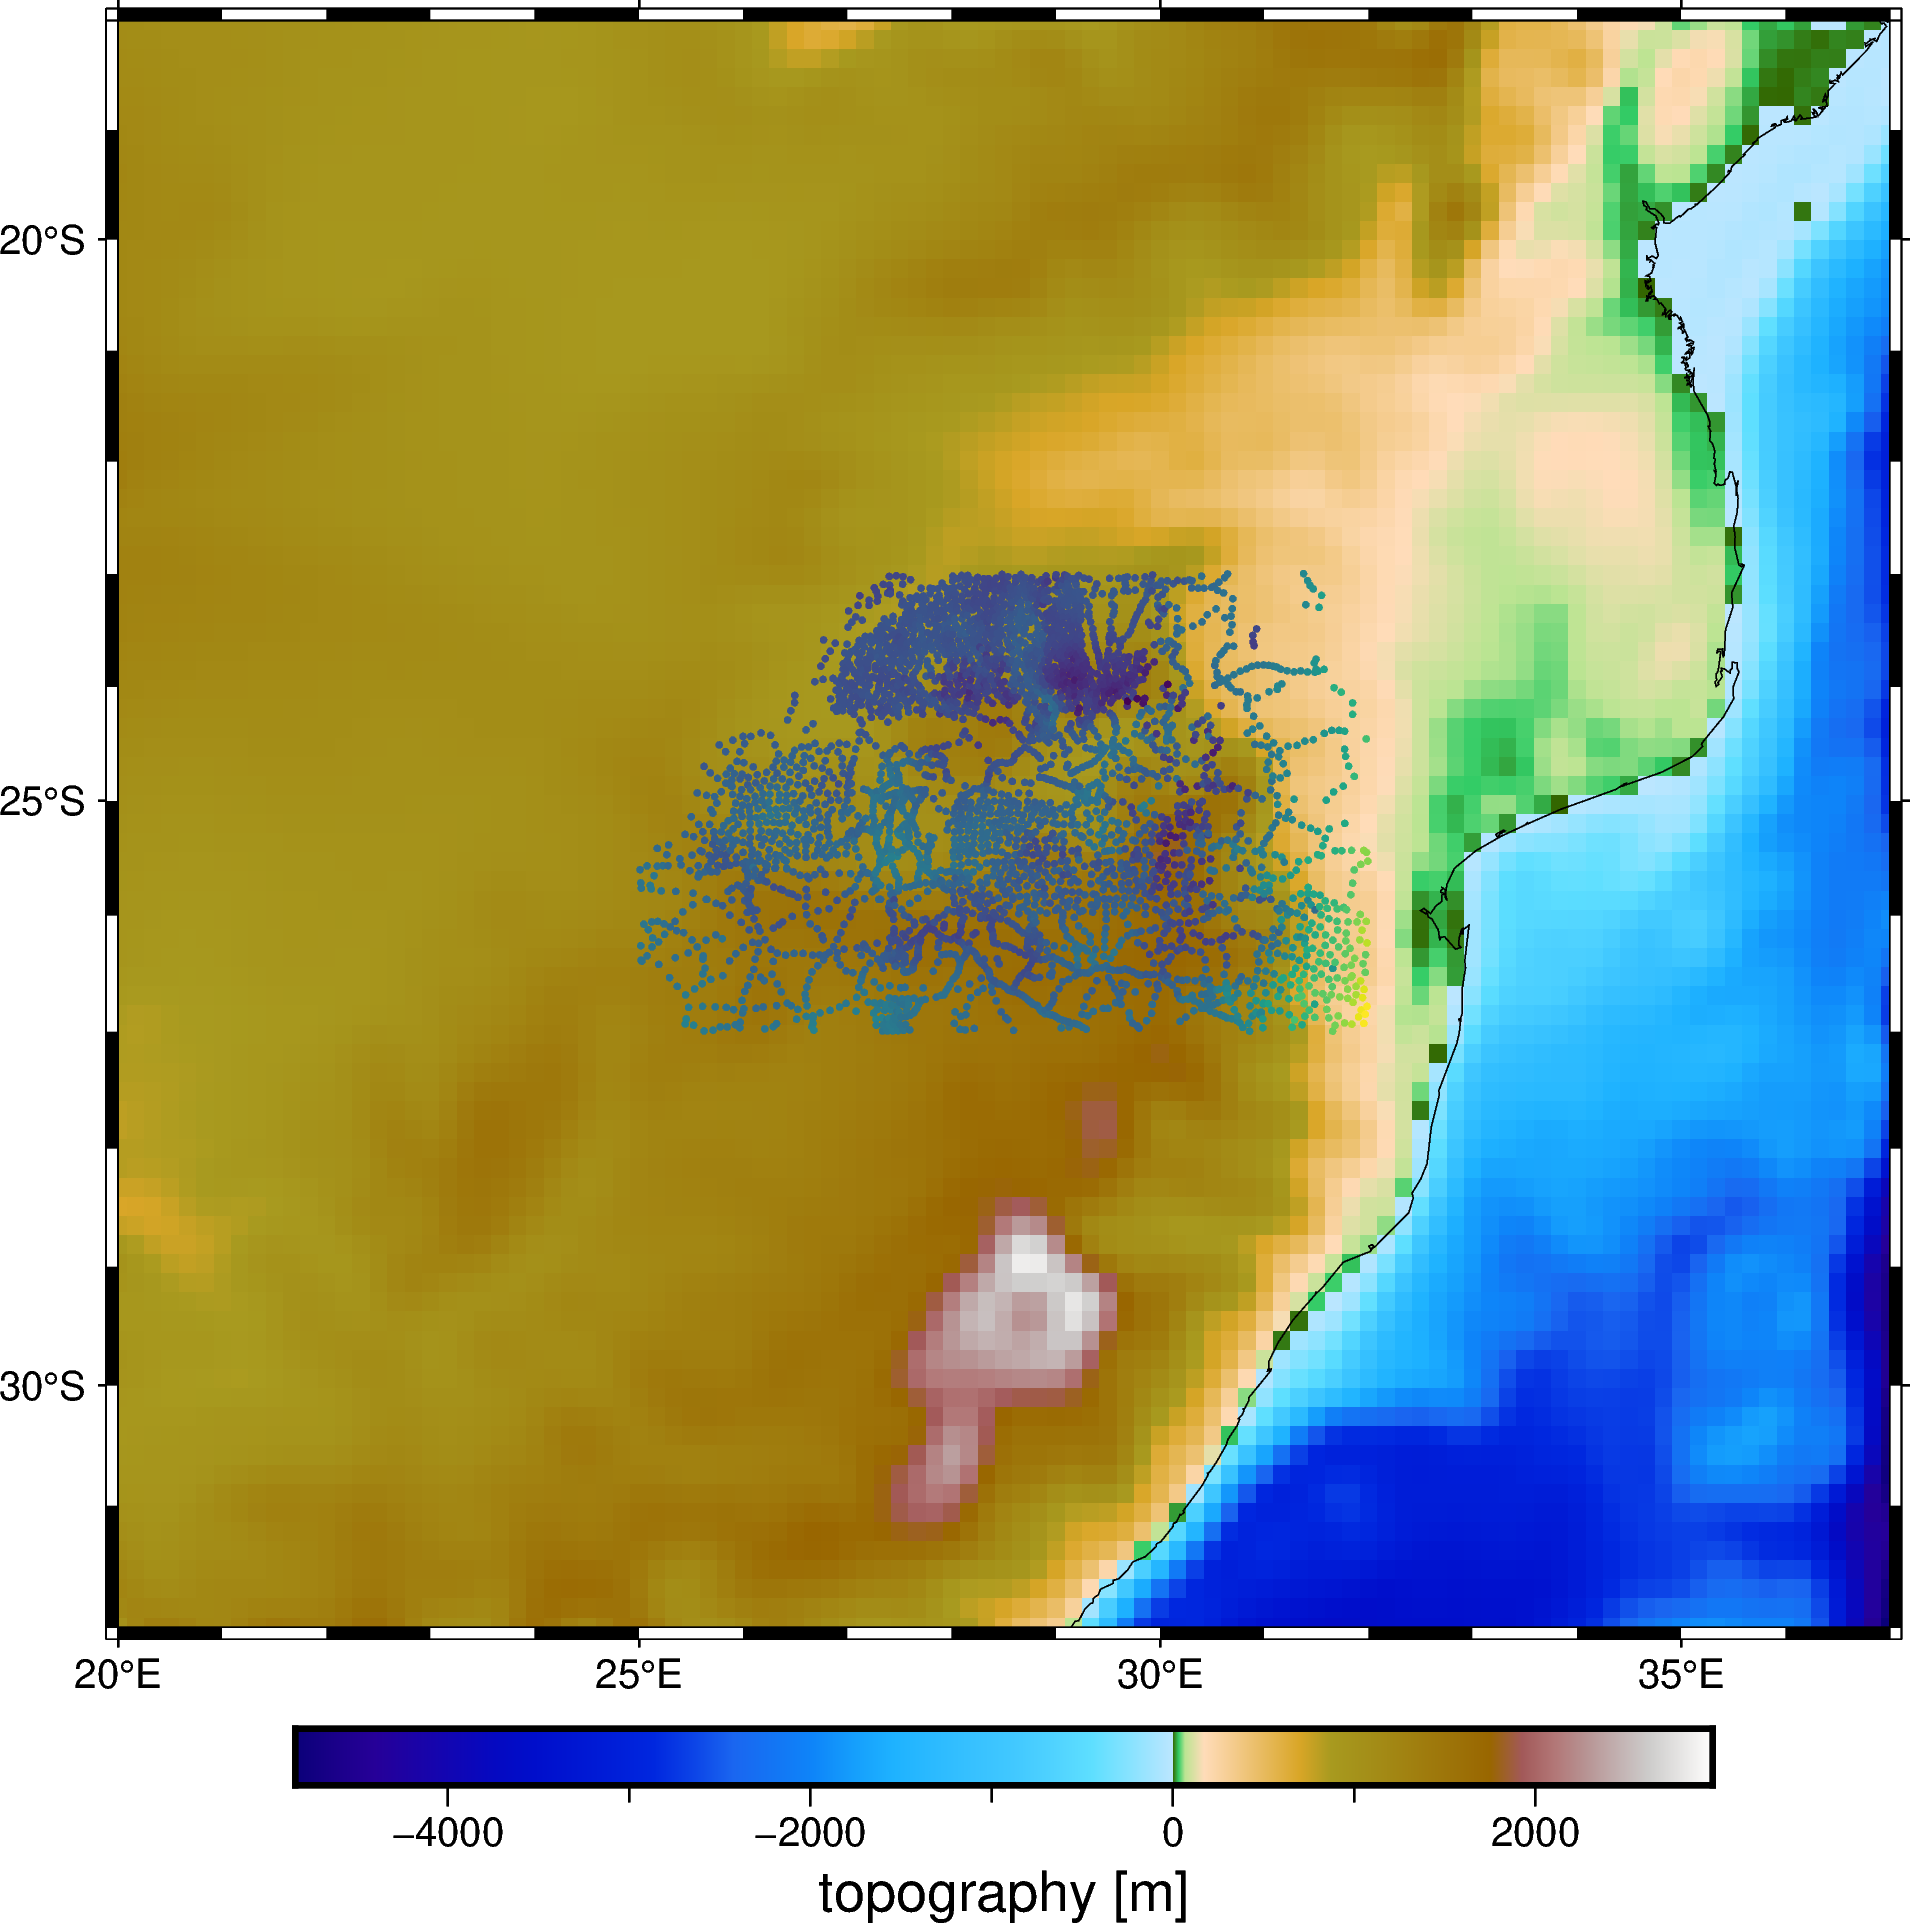

In [20]:
fig = pygmt.Figure()
fig.grdimage(topography, projection="M15c", cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
pygmt.makecpt(
    cmap="viridis",
    series=[data.gravity_mgal.min(), data.gravity_mgal.max()]
)
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_mgal,
    cmap=True,
    style="c0.06c",
)
fig.coast(shorelines="black", area_thresh=1e6)
fig.show()

## Project the grids and data | Proyectando los datos y las grillas

Dado que nuestra región es los suficientemente pequeña podemos utilizar una proyección para transformar nuestros datos en coordenadas geográficas (longitud, latitud) a coordenadas Cartesianas. Esto simplifica mucho tareas como  la interpolacióñ y las correcciones topográficas, que suelen ser mucho más rápidas en coordenadas Cartesianas que en coordenadas esféricas o geográficas.

Haremos uso de `pyproj` para crear una proyección de tipo Mercator con la latitud de la "escala real" centrada en los datos.

In [21]:
projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())

Utilicemos esta `projection` para transformar las coordenadas de nuestros datos de gravedad y luego incluirlas en el mismo `pandas.DataFrame`.

In [22]:
easting, northing = projection(data.longitude.values, data.latitude.values)
data = data.assign(easting_m=easting, northing_m=northing)
data

,longitude,latitude,height_sea_level_m,gravity_mgal,easting_m,northing_m
8648,25.01500,-26.26334,1230.2,978681.38,2.526066e+06,-2.733052e+06
8649,25.01932,-26.38713,1297.0,978669.02,2.526503e+06,-2.746924e+06
8650,25.02499,-26.39667,1304.8,978669.28,2.527075e+06,-2.747994e+06
8651,25.04500,-26.07668,1165.2,978681.08,2.529096e+06,-2.712163e+06
8652,25.07668,-26.35001,1262.5,978665.19,2.532295e+06,-2.742763e+06
...,...,...,...,...,...,...
12974,31.51500,-23.86333,300.5,978776.85,3.182450e+06,-2.466945e+06
12975,31.52499,-23.30000,280.7,978798.55,3.183459e+06,-2.405224e+06
12976,31.54832,-23.19333,245.7,978803.55,3.185814e+06,-2.393567e+06
12977,31.57333,-23.84833,226.8,978808.44,3.188340e+06,-2.465298e+06


Projectar grillas es más complicado, ya que involucra realizar algunas interpolaciones a fines de mantener los nodos equiespaciados. Verde posee la función `project_grid` que nos permite calcular todo esto de forma automática. Utilizaremos una interpolación a primeros vecinos dado que es una de las más rápidas y la proyección que elegimos no deforma tanto nuestros datos.

In [23]:
topography_proj = vd.project_grid(topography, projection, method="nearest")
topography_proj

<xarray.DataArray 'topography' (northing: 85, easting: 103)>
array([[ 1.1245e+03,  1.1245e+03,  1.3350e+03, ..., -3.5210e+03,
        -4.4460e+03, -4.8420e+03],
       [ 1.2380e+03,  1.2380e+03,  1.2270e+03, ..., -3.4570e+03,
        -4.3500e+03, -4.7360e+03],
       [ 1.2210e+03,  1.2210e+03,  1.1040e+03, ..., -3.5170e+03,
        -4.3620e+03, -4.7030e+03],
       ...,
       [ 1.1255e+03,  1.1255e+03,  1.1130e+03, ...,  3.5000e+00,
        -3.2000e+01, -1.8000e+01],
       [ 1.1045e+03,  1.1045e+03,  1.0910e+03, ...,  1.1750e+01,
        -5.0000e-01, -1.7000e+01],
       [ 1.1045e+03,  1.1045e+03,  1.0910e+03, ...,  1.1750e+01,
        -5.0000e-01, -1.7000e+01]], dtype=float32)
Coordinates:
  * easting   (easting) float64 2.02e+06 2.036e+06 ... 3.72e+06 3.736e+06
  * northing  (northing) float64 -3.393e+06 -3.375e+06 ... -1.855e+06 -1.836e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

In [24]:
geoid_proj = vd.project_grid(geoid, projection, method="nearest")
geoid_proj

<xarray.DataArray 'geoid' (northing: 55, easting: 103)>
array([[35.800003 , 35.800003 , 36.8      , ..., 22.1      , 21.       ,
        20.4      ],
       [36.300003 , 36.300003 , 36.8      , ..., 21.85     , 20.7      ,
        20.1      ],
       [36.35     , 36.35     , 36.600002 , ..., 21.5      , 20.300001 ,
        19.6      ],
       ...,
       [25.900002 , 25.900002 , 25.6      , ...,  3.0500002,  3.       ,
         2.8      ],
       [25.550001 , 25.550001 , 25.150002 , ...,  2.4750001,  2.3000002,
         2.       ],
       [25.550001 , 25.550001 , 25.150002 , ...,  2.4750001,  2.3000002,
         2.       ]], dtype=float32)
Coordinates:
  * easting   (easting) float64 2.02e+06 2.036e+06 ... 3.72e+06 3.736e+06
  * northing  (northing) float64 -3.393e+06 -3.374e+06 ... -2.391e+06 -2.372e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

## Reference heights to the ellipsoid

Antes de que podamos calcular disturbios de gravedad, necesitamos que tanto las altitudes de observación así como la topografía se referencien sobre el elipsoide en vez del nivel del mar (o el geoide). Podemos hacer esto sumando la altitud del geoide a estas altitudes.

In [25]:
topography_geometric = topography_proj + geoid_proj
topography_geometric

<xarray.DataArray (northing: 1, easting: 103)>
array([[ 1160.3 ,  1160.3 ,  1371.8 ,  1352.1 ,  1352.1 ,  1251.  ,
         1283.4 ,  1283.4 ,  1429.9 ,  1476.7 ,  1476.7 ,  1424.4 ,
         1463.9 ,  1463.9 ,  1622.5 ,  1585.2 ,  1585.2 ,  1330.5 ,
         1182.45,  1182.45,  1131.7 ,  1195.2 ,  1195.2 ,  1487.2 ,
         1604.25,  1604.25,  1366.9 ,  1351.35,  1351.35,  1583.1 ,
         1487.  ,  1487.  ,  1208.6 ,  1103.2 ,  1103.2 ,  1136.1 ,
         1281.9 ,  1281.9 ,  1372.6 ,  1319.5 ,  1227.3 ,  1138.  ,
         1026.95,  1026.95,   984.1 ,  1017.65,  1017.65,  1000.2 ,
          928.1 ,   928.1 ,   798.2 ,   588.15,   588.15,   448.3 ,
          231.55,   231.55,  -442.5 , -1666.45, -1666.45, -2694.5 ,
        -2901.65, -2901.65, -2851.6 , -2974.2 , -3185.7 , -3342.1 ,
        -3402.55, -3436.55, -3490.9 , -3556.7 , -3556.7 , -3564.4 ,
        -3534.  , -3534.  , -3494.5 , -3494.  , -3494.  , -3488.4 ,
        -3456.85, -3456.85, -3461.2 , -3356.85, -3356.85, -3119.5 ,
        -2865.2 , -2865.2 , -2564.8 , -2274.  , -2274.  , -2085.3 ,
        -1979.2 , -1888.2 , -1866.3 , -1926.5 , -1996.8 , -2008.  ,
        -2065.65, -2065.65, -2520.7 , -3498.9 , -3498.9 , -4425.  ,
        -4821.6 ]], dtype=float32)
Coordinates:
  * northing  (northing) float64 -3.393e+06
  * easting   (easting) float64 2.02e+06 2.036e+06 ... 3.72e+06 3.736e+06

Para transformar las altitudes de observación es necesario que interpolemos la grilla del geoide sobre los puntos de observación de los datos de gravedad. Podemos hacer esto mediante una interpolación cúbica con Verde. 

In [26]:
# Transformamos la grilla de geoide en una tabla
geoid_table = vd.grid_to_table(geoid_proj)

# Creamos el interpolador
interpolator = vd.ScipyGridder(method="cubic")
interpolator.fit((geoid_table.easting, geoid_table.northing), geoid_table.geoid)

# Predecimos los valores de geoide sobre los puntos de observacion
geoid_on_data = interpolator.predict((data.easting_m, data.northing_m))

# Agregamos la altitud del geoide y la altitiud geometrica al DataFrame
data = data.assign(geoid_m=geoid_on_data)
data = data.assign(height_geometric_m=data.height_sea_level_m + data.geoid_m)
data

,longitude,latitude,height_sea_level_m,gravity_mgal,easting_m,northing_m,geoid_m,height_geometric_m
8648,25.01500,-26.26334,1230.2,978681.38,2.526066e+06,-2.733052e+06,27.646267,1257.846267
8649,25.01932,-26.38713,1297.0,978669.02,2.526503e+06,-2.746924e+06,28.051651,1325.051651
8650,25.02499,-26.39667,1304.8,978669.28,2.527075e+06,-2.747994e+06,28.078403,1332.878403
8651,25.04500,-26.07668,1165.2,978681.08,2.529096e+06,-2.712163e+06,26.840736,1192.040736
8652,25.07668,-26.35001,1262.5,978665.19,2.532295e+06,-2.742763e+06,27.941628,1290.441628
...,...,...,...,...,...,...,...,...
12974,31.51500,-23.86333,300.5,978776.85,3.182450e+06,-2.466945e+06,12.528084,313.028084
12975,31.52499,-23.30000,280.7,978798.55,3.183459e+06,-2.405224e+06,11.952243,292.652243
12976,31.54832,-23.19333,245.7,978803.55,3.185814e+06,-2.393567e+06,11.785730,257.485730
12977,31.57333,-23.84833,226.8,978808.44,3.188340e+06,-2.465298e+06,12.502170,239.302170


## Gravity disturbance

Calculemos el disturbio de gravedad

In [27]:
ellipsoid = bl.WGS84
ellipsoid

Ellipsoid(name='WGS84', semimajor_axis=6378137, flattening=0.0033528106647474805, geocentric_grav_const=398600441800000.0, angular_velocity=7.292115e-05, long_name='World Geodetic System 1984', reference='Hofmann-Wellenhof, B., & Moritz, H. (2006). Physical Geodesy (2nd, corr. ed. 2006 edition ed.). Wien\u202f; New York: Springer.')

In [29]:
normal_gravity = ellipsoid.normal_gravity(data.latitude, data.height_geometric_m)

gravity_disturbance = data.gravity_mgal - normal_gravity

data = data.assign(gravity_disturbance_mgal=gravity_disturbance)
data

,longitude,latitude,height_sea_level_m,gravity_mgal,easting_m,northing_m,geoid_m,height_geometric_m,gravity_disturbance_mgal
8648,25.01500,-26.26334,1230.2,978681.38,2.526066e+06,-2.733052e+06,27.646267,1257.846267,25.196276
8649,25.01932,-26.38713,1297.0,978669.02,2.526503e+06,-2.746924e+06,28.051651,1325.051651,24.685467
8650,25.02499,-26.39667,1304.8,978669.28,2.527075e+06,-2.747994e+06,28.078403,1332.878403,26.674139
8651,25.04500,-26.07668,1165.2,978681.08,2.529096e+06,-2.712163e+06,26.840736,1192.040736,17.934324
8652,25.07668,-26.35001,1262.5,978665.19,2.532295e+06,-2.742763e+06,27.941628,1290.441628,12.845254
...,...,...,...,...,...,...,...,...,...
12974,31.51500,-23.86333,300.5,978776.85,3.182450e+06,-2.466945e+06,12.528084,313.028084,-4.685858
12975,31.52499,-23.30000,280.7,978798.55,3.183459e+06,-2.405224e+06,11.952243,292.652243,48.002152
12976,31.54832,-23.19333,245.7,978803.55,3.185814e+06,-2.393567e+06,11.785730,257.485730,49.128762
12977,31.57333,-23.84833,226.8,978808.44,3.188340e+06,-2.465298e+06,12.502170,239.302170,5.148730


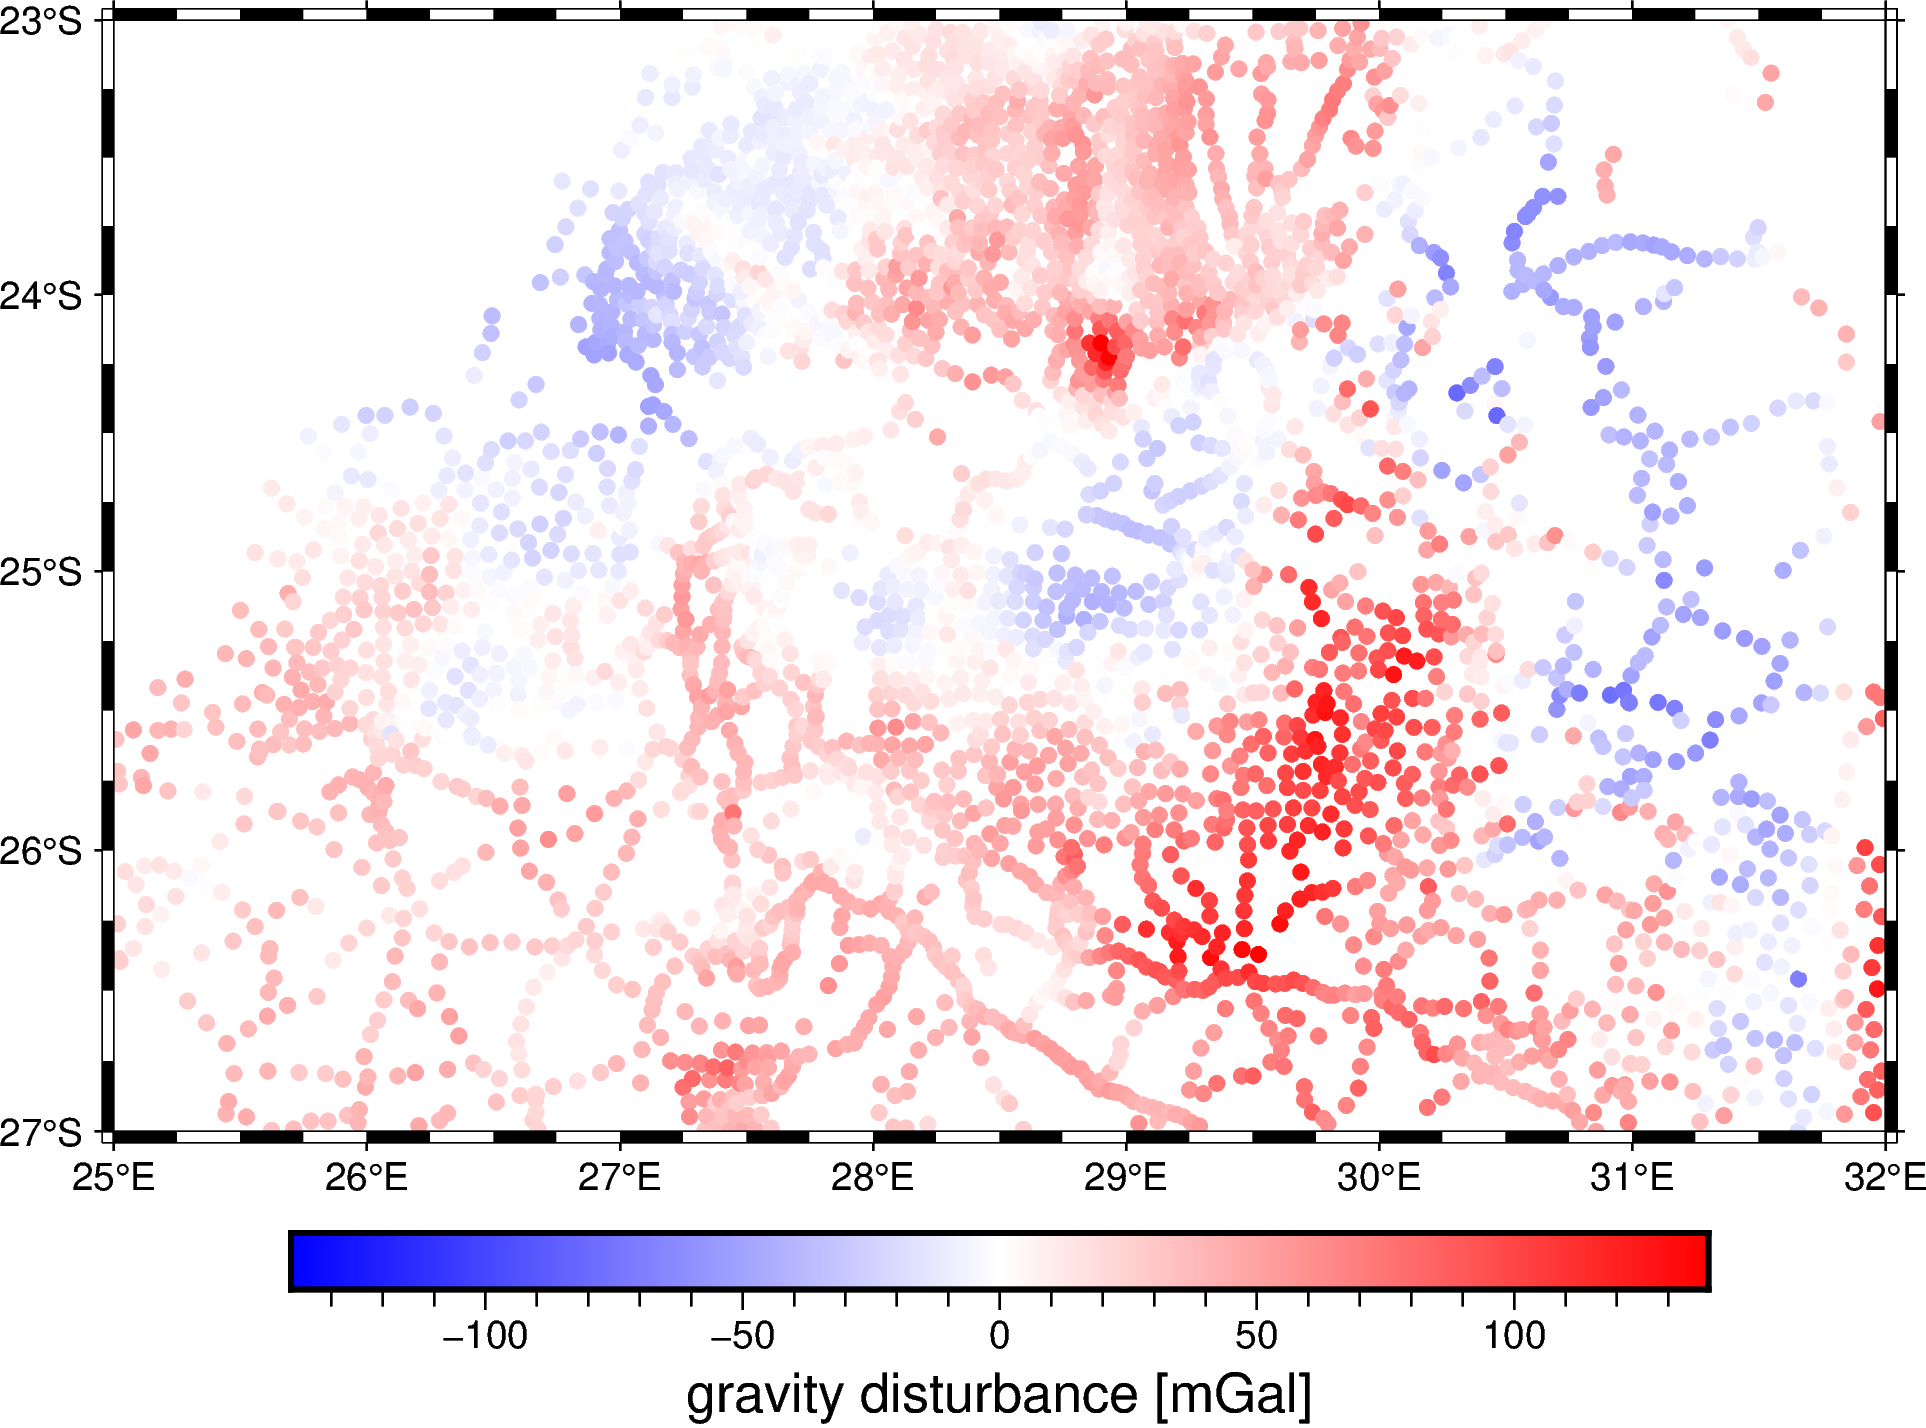

In [32]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection="M15c", 
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show()